Simulador de Propagación de Información en una Red Social




Generando red...
Calculando distancias más cortas con Floyd-Warshall...
Simulando propagación de la información...

Tiempo en que cada nodo recibe la información:
  P1: t = 1
  P2: t = 1
  P3: t = 0
  P4: t = 1
  P5: t = 1
  P6: t = 1

Visualizando propagación...


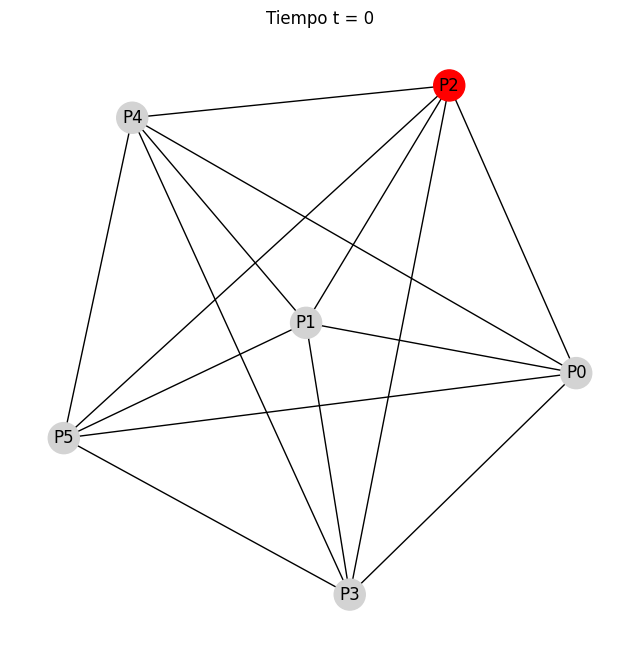

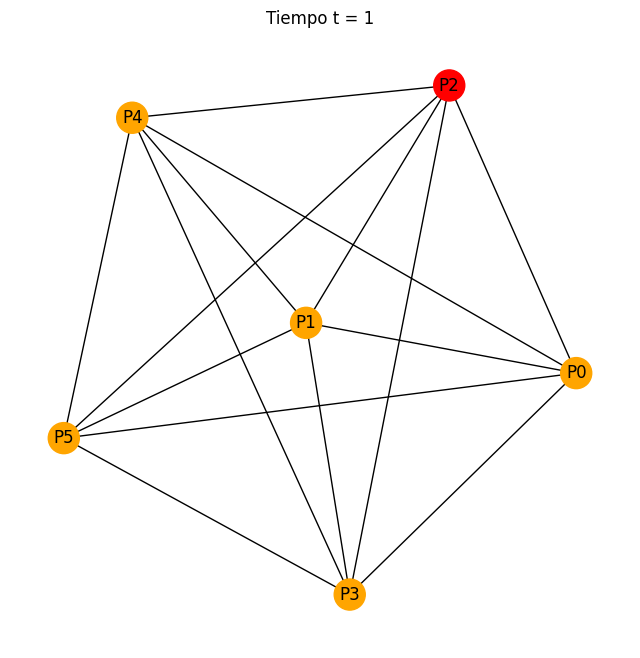

Simulación finalizada.


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Genera un grafo conexo, es decir, un grafo en el que es posible llegar de un
# nodo a cualquier otro nodo del grafo
def generar_red_aleatoria(num_nodos, prob_conexion):
    G = nx.erdos_renyi_graph(num_nodos, prob_conexion)
    while not nx.is_connected(G):
        G = nx.erdos_renyi_graph(num_nodos, prob_conexion)
    return G

# Calcular las distancias mas cortas entre todos los pares de nodos en un
# grafo
# Usamos un grafo no ponderado donde todas las conexiones tienen peso 1
def floyd_warshall(graph):
    n = len(graph.nodes)
    dist = np.full((n, n), np.inf)
    for u in graph.nodes:
        dist[u][u] = 0
        for v in graph.neighbors(u):
            dist[u][v] = 1

    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

def propagar_informacion(graph, fuente, distancias):
    n = len(graph.nodes)
    tiempo_llegada = [np.inf] * n
    tiempo_llegada[fuente] = 0

    for nodo in range(n):
        if nodo != fuente:
            tiempo_llegada[nodo] = distancias[fuente][nodo]

    return tiempo_llegada

def simular(graph, fuente, distancias):
    tiempos = propagar_informacion(graph, fuente, distancias)
    max_tiempo = int(max(tiempos))
    estado_propagacion = [[] for _ in range(max_tiempo + 1)]

    for nodo, tiempo in enumerate(tiempos):
        if np.isfinite(tiempo):
            estado_propagacion[int(tiempo)].append(nodo)

    return estado_propagacion, tiempos


def visualizar_propagacion(graph, estados, tiempos, fuente):
    pos = nx.spring_layout(graph)
    colores_base = ['lightgray'] * len(graph.nodes)

    for t, nodos_en_tiempo in enumerate(estados):
        colores = colores_base[:]
        
        # Actualizar colores de los nodos según el tiempo
        for tiempo_pasado in range(t + 1):
            for nodo in estados[tiempo_pasado]:
                colores[nodo] = 'orange'
        colores[fuente] = 'red'

        # Crear un nuevo diccionario de etiquetas (sin t en los nodos)
        labels = {nodo: f'P{nodo}' for nodo in graph.nodes}

        # Crear una nueva figura para cada paso de la propagación
        fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

        # Dibuja el gráfico del primer subplot (el grafo)
        nx.draw(graph, pos, node_color=colores, with_labels=True, node_size=500, labels=labels, ax=ax1)
        ax1.set_title(f"Tiempo t = {t}")

        # Muestra el gráfico actualizado en la notebook
        plt.show()  # Esto muestra el gráfico de forma independiente

        # Pausa opcional para ver el gráfico antes de pasar al siguiente
        plt.pause(0.1)  # Para dar tiempo a ver el gráfico antes de avanzar al siguiente paso



def comprobar_inputs(num_nodos, probabilidad, fuente):

    check = True
    print("\n")
    if num_nodos <= 0:
        print("Número de nodos debe ser mayor que 0.")
        check = False

    if not (0 < probabilidad <= 1):
        print("La probabilidad debe ser mayor que 0 y menor o igual que 1")
        check = False

    if not (0 <= fuente < num_nodos):
        print(f"El nodo fuente debe estar entre 0 y {num_nodos-1}.")
        check = False

    return check


def main():
    print("Simulador de Propagación de Información en una Red Social\n")
    num_nodos = int(input("Número de nodos/personas en la red: "))
    probabilidad = float(input("Probabilidad de conexión entre personas (0 a 1]. Recuerda que una probabilidad muy pequeña puede hacer que la generación del grafo no sea posible: "))
    fuente = int(input(f"Nodo fuente de la información (entre 0 y {num_nodos-1}): "))
    if not comprobar_inputs(num_nodos, probabilidad, fuente):
        return

    print("\nGenerando red...")
    G = generar_red_aleatoria(num_nodos, probabilidad)
    print("Calculando distancias más cortas con Floyd-Warshall...")
    distancias = floyd_warshall(G)

    print("Simulando propagación de la información...")
    estados, tiempos = simular(G, fuente, distancias)

    print("\nTiempo en que cada nodo recibe la información:")
    for nodo, t in enumerate(tiempos):
        print(f"  P{nodo + 1}: t = {t:.0f}")

    print("\nVisualizando propagación...")
    visualizar_propagacion(G, estados, tiempos, fuente)

    print("Simulación finalizada.")

if __name__ == "__main__":
    main()
